#

# COGS 118C Final Project - Jupyter Notebook analysis
## Analyzing differing frequencies bands’ contributions to wake v. sleep states in rats

Calixto Calangi

Valerie Ortiz 

Indrani Vairagare   

### Setup

In [99]:
### code imported for conducting analysis ###

#We need to utilize SciPy io to read the .mat file of the data
#Since we're going to perform power spectral density and plotting them, we will be utilizing
#NumPy and Matplotlib

from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy import signal

In [8]:
#We want to load the rat LFP file using io
rat_data = io.loadmat('LFP_rat.mat',  squeeze_me = True)

#Since we want to look at the sleep v. wake states, we want to look
#at the header/dictionary keys
print(rat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'cells_wake', 'cells_sleep', 'lfp_wake', 'lfp_sleep', 't_wake', 't_sleep', 'cell_info', 'fs'])


What we glean from this is that there are the 'lfp_wake', 'lfp_sleep', 
't_wake' and 't_sleep' which are relevant for our analysis

The first two refer to the LFP during the two states

The latter two refer to the time periods in which they took place.

In [9]:
#parameters, set up based on rat_data.keys()
Fs = rat_data['fs'] #the sampling rate



For now, we'll plot what the LFP data looks like, then perform the PSD on it.

Text(0.5, 1.0, 'LFP during wake state')

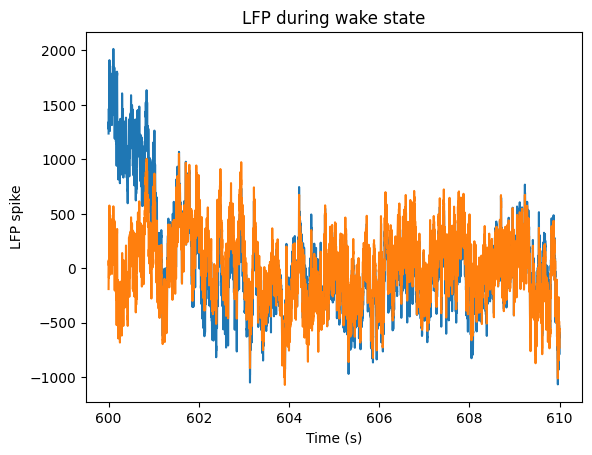

In [10]:
#Plot LFP
#Since the time from 600-900 is crowded, we can just look at the first
#10s
plt.plot(rat_data['t_wake'][:rat_data['fs']*10], rat_data['lfp_wake'][:,:rat_data['fs']*10].T)
plt.xlabel("Time (s)")
plt.ylabel("LFP spike")
plt.title("LFP during wake state")

Text(0.5, 1.0, 'LFP during sleep state')

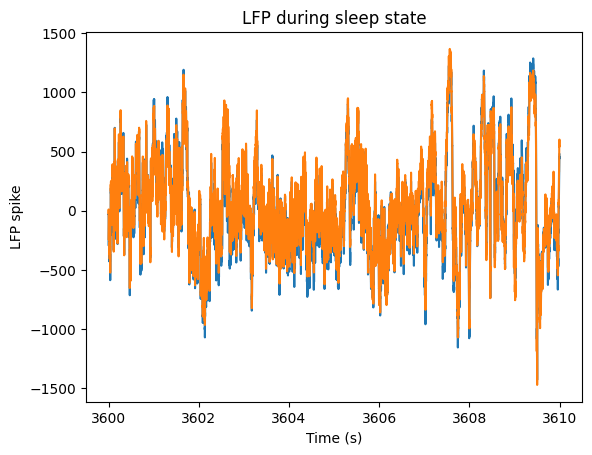

In [6]:
#LFP during sleep state
plt.plot(rat_data['t_sleep'][:rat_data['fs']*10],rat_data['lfp_sleep'][:,:rat_data['fs']*10].T)
plt.xlabel("Time (s)")
plt.ylabel("LFP spike")
plt.title("LFP during sleep state")

### Pre-processing

Since we're working with 2 channels, we can separate them each to analyze them separately to see if there is significant difference/contributions from each LFP for each state.

We also want to use filters for each state so we can filter out noise/frequencies to accentuate those purported to be associated with each state.

#### Separating channels ####

In [90]:
#separate the two channels for each state

###### wake ######
wake1_channel = rat_data['lfp_wake'][0]
wake2_channel = rat_data['lfp_wake'][1]
print("The shape of the original rat LFP data is: " + str(rat_data['lfp_wake'].shape))

##### sleep ######
sleep1_channel = rat_data['lfp_sleep'][0]
sleep2_channel = rat_data['lfp_sleep'][1]
print(wake2_channel.shape)
print(wake1_channel.shape)



The shape of the original rat LFP data is: (2, 375000)
(375000,)
(375000,)


### Filtering

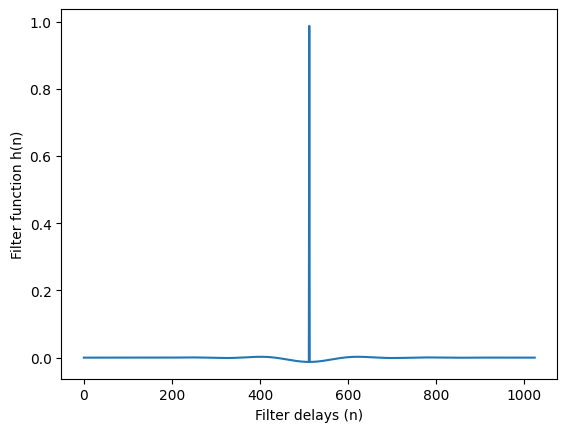

In [89]:
###filtering the signals
#high pass to allow higher frequencies than 8Hz
n = 1025
hp = signal.firwin(n,cutoff=8,fs=Fs, pass_zero='highpass') # This function designs a FIR filter
#Sanity check, check filter working as intended
plt.plot(hp)
plt.xlabel('Filter delays (n)')
plt.ylabel('Filter function h(n)')

#, allow less than 8Hz
lp = signal.firwin(n,cutoff=8,fs=Fs, pass_zero='lowpass') # This function designs a FIR filter




### Do filtering on separate channels for each state
A total of 4 individualized states (1wake, 2wake, 1sleep, 2sleep).

In [92]:
#### apply filtering 
#wake state
hpf_1wake = np.convolve(wake1_channel, hp, mode='same')
hpf_2wake = np.convolve(wake2_channel, hp, mode='same')

#sleep state
lpf_1sleep = np.convolve(sleep1_channel, lp, mode='same')
lpf_2sleep = np.convolve(sleep2_channel, lp, mode='same')


### Perform PSD on both the wake and sleep states

#### PSD on wake state

##### Wake 1 channel

<function matplotlib.pyplot.show(close=None, block=None)>

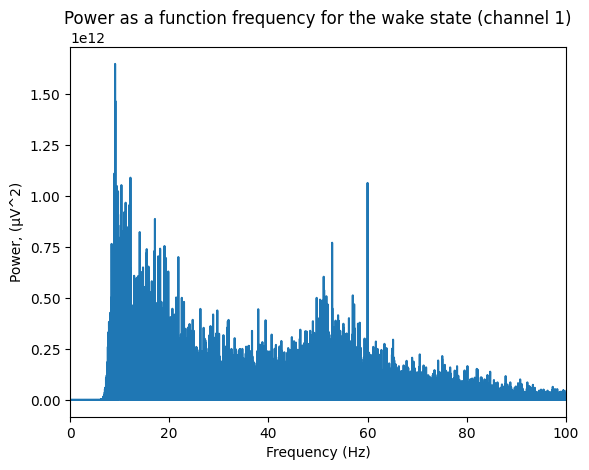

In [102]:
#Power first, FFT on LFP to confirm to the frequency domain
wake_1dft = np.fft.fft(hpf_1wake.T)
wake_1power = np.abs(wake_1dft) ** 2
wake_frequency = np.fft.fftfreq(len(rat_data['t_wake']), d=1/Fs)

#Plot wake state
plt.plot(wake_frequency, wake_1power)
plt.title('Power as a function frequency for the wake state (channel 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power, (μV^2)')
plt.xlim(0,100)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

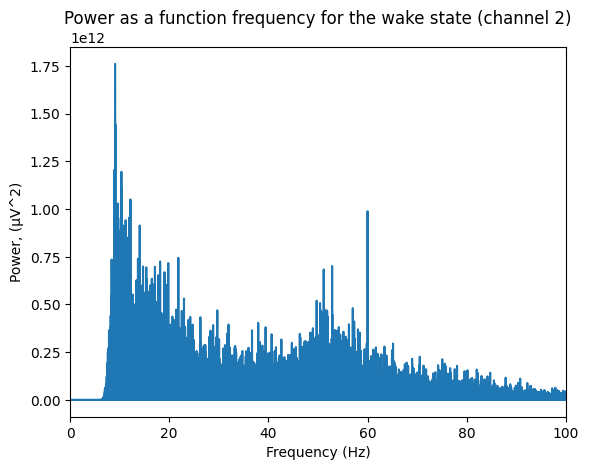

In [103]:
#Power first, FFT on LFP to confirm to the frequency domain
wake_2dft = np.fft.fft(hpf_2wake.T)
wake_2power = np.abs(wake_2dft) ** 2
wake_frequency = np.fft.fftfreq(len(rat_data['t_wake']), d=1/Fs)

#Plot wake state
plt.plot(wake_frequency, wake_2power)
plt.title('Power as a function frequency for the wake state (channel 2)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power, (μV^2)')
plt.xlim(0,100)
plt.show

##### Welch's on wake channel 1

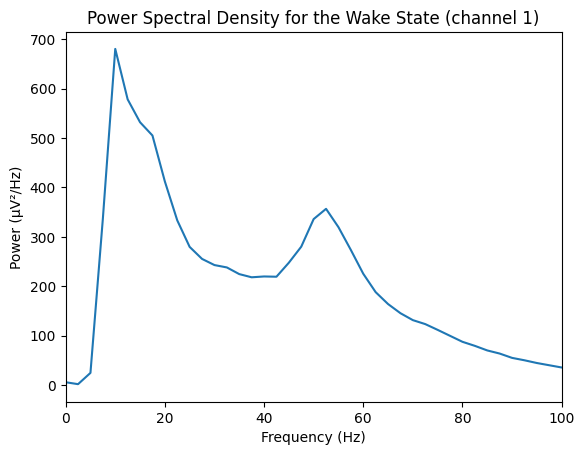

In [104]:
#perform PSD w/ Welch's on wake state
wake_frequencies, wake_1psd = welch(hpf_1wake, fs=Fs, nperseg=500)

# Plot the PSD
plt.plot(wake_frequencies, wake_1psd)
plt.title('Power Spectral Density for the Wake State (channel 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (μV²/Hz)')
plt.xlim(0, 100)
plt.show()

##### Welch's on wake channel 2

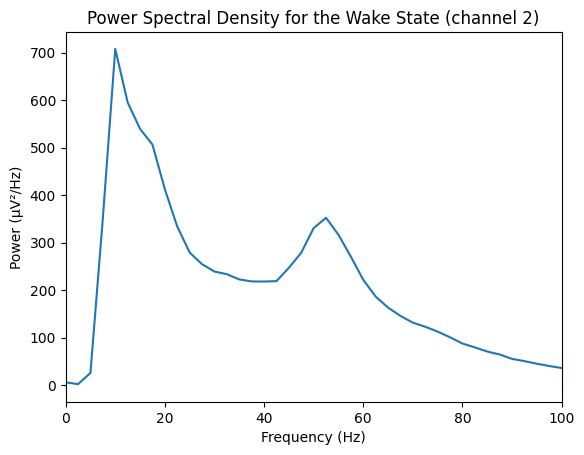

In [105]:
#perform PSD w/ Welch's on wake state
wake_frequencies, wake_2psd = welch(hpf_2wake, fs=Fs, nperseg=500)

# Plot the PSD
plt.plot(wake_frequencies, wake_2psd)
plt.title('Power Spectral Density for the Wake State (channel 2)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (μV²/Hz)')
plt.xlim(0, 100)
plt.show()

#### PSD on sleep state

##### sleep channel 1

<function matplotlib.pyplot.show(close=None, block=None)>

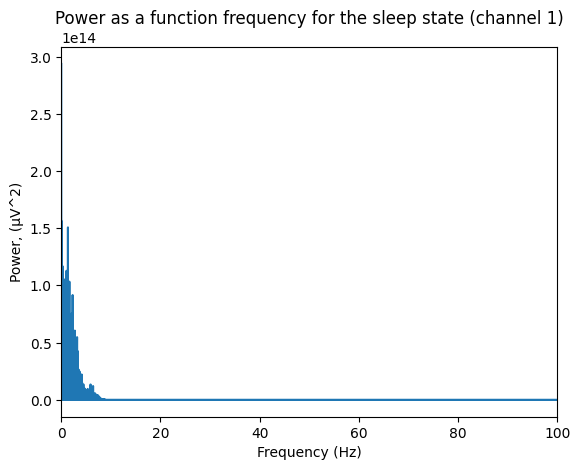

In [106]:
#Same thing for sleep state
sleep_1dft = np.fft.fft(lpf_1sleep.T)
sleep_1power = np.abs(sleep_1dft) ** 2
sleep_frequency = np.fft.fftfreq(len(rat_data['t_sleep']), d=1/Fs)

plt.plot(sleep_frequency, sleep_1power)
plt.title('Power as a function frequency for the sleep state (channel 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power, (μV^2)')
plt.xlim(0,100)
plt.show

##### sleep channel 2

<function matplotlib.pyplot.show(close=None, block=None)>

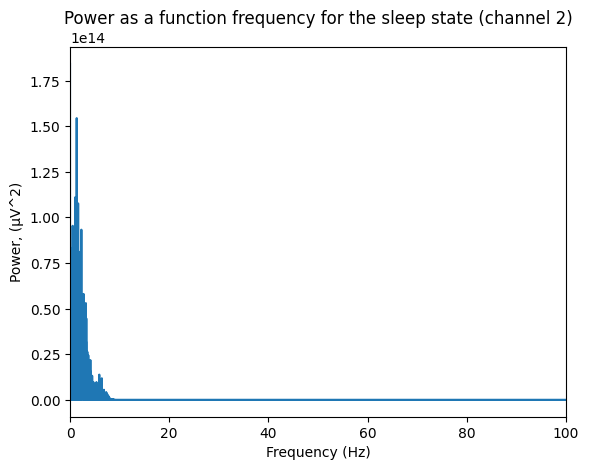

In [107]:
#Same thing for sleep state
sleep_2dft = np.fft.fft(lpf_2sleep.T)
sleep_2power = np.abs(sleep_2dft) ** 2
sleep_frequency = np.fft.fftfreq(len(rat_data['t_sleep']), d=1/Fs)

plt.plot(sleep_frequency, sleep_2power)
plt.title('Power as a function frequency for the sleep state (channel 2)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power, (μV^2)')
plt.xlim(0,100)
plt.show

##### Welch's on channel 1

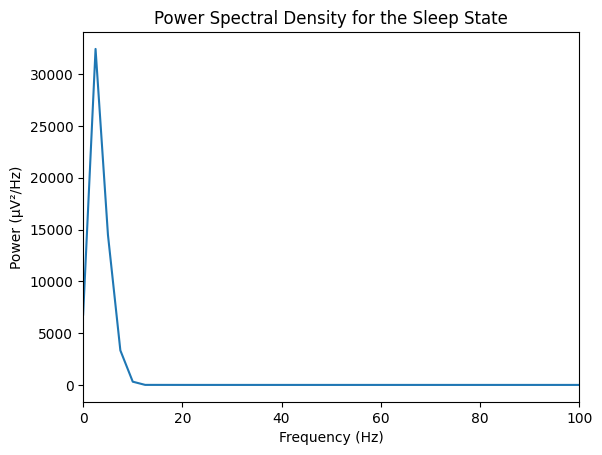

In [100]:
#PSD on sleep state
sleep_freq, sleep_1psd = welch(lpf_1sleep, fs=Fs, nperseg=500)

# Plot the PSD
plt.plot(sleep_freq, sleep_1psd)
plt.title('Power Spectral Density for the Sleep State')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (μV²/Hz)')
plt.xlim(0, 100)
plt.show()


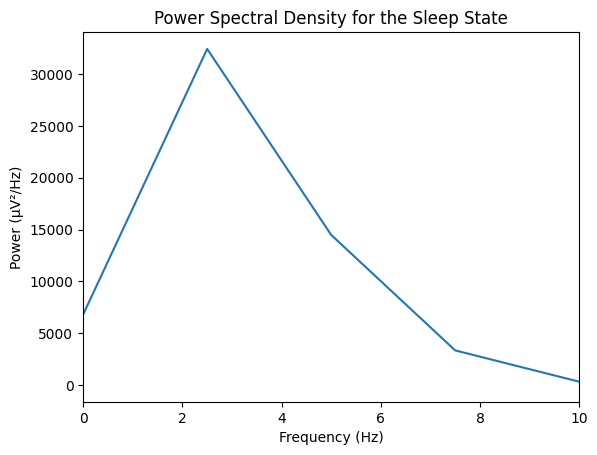

In [101]:
###zoom in lower frequencies for clarity
plt.plot(sleep_freq, sleep_1psd)
plt.title('Power Spectral Density for the Sleep State')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (μV²/Hz)')
plt.xlim(0, 10)
plt.show()


##### Welch's on sleep channel 2

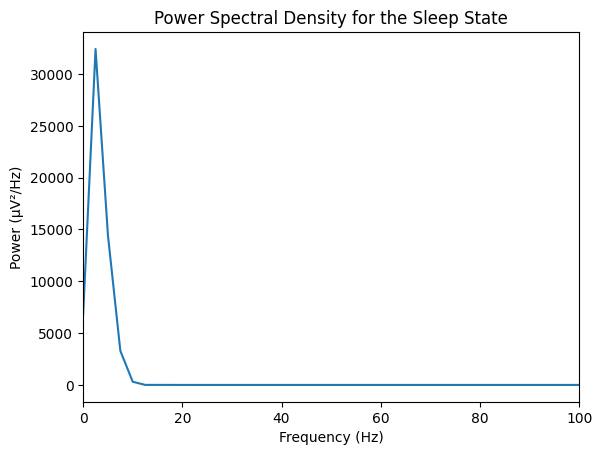

In [108]:
#PSD on sleep state
sleep_freq, sleep_2psd = welch(lpf_2sleep, fs=Fs, nperseg=500)

# Plot the PSD
plt.plot(sleep_freq, sleep_2psd)
plt.title('Power Spectral Density for the Sleep State')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (μV²/Hz)')
plt.xlim(0, 100)
plt.show()

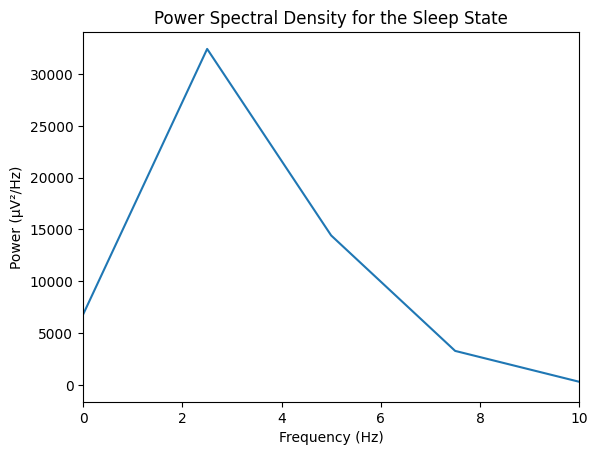

In [109]:
###zoom in lower frequencies for clarity
plt.plot(sleep_freq, sleep_2psd)
plt.title('Power Spectral Density for the Sleep State')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (μV²/Hz)')
plt.xlim(0, 10)
plt.show()
